In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from pandas import DataFrame
import seaborn as sb
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)


In [2]:
df=pd.read_csv('Bankruptcy data1.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [96]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [97]:
df[:3:13]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.0,0.458143,0.000725,0.0,0.14795,0.14795,0.14795,0.169141,0.311664,0.01756,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.2631,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,0.000182,0.000117,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,0.000147,0.147308,0.334015,0.27692,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,701000000.0,6.550000e+09,0.593831,458000000.0,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.11825,0,0.716845,0.009219,0.622879,0.601453,0.82789,0.290202,0.026601,0.56405,1,0.016469


In [98]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [99]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Bankrupt? - 0.0%
 ROA(C) before interest and depreciation before interest - 0.0%
 ROA(A) before interest and % after tax - 0.0%
 ROA(B) before interest and depreciation after tax - 0.0%
 Operating Gross Margin - 0.0%
 Realized Sales Gross Margin - 0.0%
 Operating Profit Rate - 0.0%
 Pre-tax net Interest Rate - 0.0%
 After-tax net Interest Rate - 0.0%
 Non-industry income and expenditure/revenue - 0.0%
 Continuous interest rate (after tax) - 0.0%
 Operating Expense Rate - 0.0%
 Research and development expense rate - 0.0%
 Cash flow rate - 0.0%
 Interest-bearing debt interest rate - 0.0%
 Tax rate (A) - 0.0%
 Net Value Per Share (B) - 0.0%
 Net Value Per Share (A) - 0.0%
 Net Value Per Share (C) - 0.0%
 Persistent EPS in the Last Four Seasons - 0.0%
 Cash Flow Per Share - 0.0%
 Revenue Per Share (Yuan ¥) - 0.0%
 Operating Profit Per Share (Yuan ¥) - 0.0%
 Per Share Net profit before tax (Yuan ¥) - 0.0%
 Realized Sales Gross Profit Growth Rate - 0.0%
 Operating Profit Growth Rate - 0.0%


In [100]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

# Before data balance

In [101]:
X=df.drop('Bankrupt?',axis = 1)
y=df["Bankrupt?"]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1) Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)

C:\Users\ARSHIYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [105]:
y_pred = classifier1.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1972   15]
 [  48   11]]


0.969208211143695

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.42      0.19      0.26        59

    accuracy                           0.97      2046
   macro avg       0.70      0.59      0.62      2046
weighted avg       0.96      0.97      0.96      2046



# 2) KNN 

In [108]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=7)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [109]:
y_pred = classifier2.predict(X_test)

C:\Users\ARSHIYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [110]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1978    9]
 [  50    9]]


0.9711632453567938

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1987
           1       0.50      0.15      0.23        59

    accuracy                           0.97      2046
   macro avg       0.74      0.57      0.61      2046
weighted avg       0.96      0.97      0.96      2046



# 3) SVM

In [112]:
from sklearn import svm
classifier3 = svm.SVC(kernel = 'linear',  probability=True)
classifier3.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [113]:
y_pred = classifier3.predict(X_test)

In [114]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1983    4]
 [  53    6]]


0.9721407624633431

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.60      0.10      0.17        59

    accuracy                           0.97      2046
   macro avg       0.79      0.55      0.58      2046
weighted avg       0.96      0.97      0.96      2046



# 4) LDA

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier4 = LinearDiscriminantAnalysis( )
classifier4.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [117]:
y_pred = classifier4.predict(X_test)

In [118]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1962   25]
 [  42   17]]


0.9672531769305963

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.40      0.29      0.34        59

    accuracy                           0.97      2046
   macro avg       0.69      0.64      0.66      2046
weighted avg       0.96      0.97      0.96      2046



# 5) Multilayer Perceptron

In [120]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.56980453
Iteration 2, loss = 0.23023907
Iteration 3, loss = 0.12835435
Iteration 4, loss = 0.10114179
Iteration 5, loss = 0.09350327
Iteration 6, loss = 0.08859140
Iteration 7, loss = 0.08519945
Iteration 8, loss = 0.08214393
Iteration 9, loss = 0.08147345
Iteration 10, loss = 0.07801082
Iteration 11, loss = 0.07774556
Iteration 12, loss = 0.07557628
Iteration 13, loss = 0.07415752
Iteration 14, loss = 0.07221419
Iteration 15, loss = 0.07258364
Iteration 16, loss = 0.07033403
Iteration 17, loss = 0.07059971
Iteration 18, loss = 0.06857172
Iteration 19, loss = 0.06915032
Iteration 20, loss = 0.06814403
Iteration 21, loss = 0.06664925
Iteration 22, loss = 0.06400824
Iteration 23, loss = 0.06426416
Iteration 24, loss = 0.06337040
Iteration 25, loss = 0.06186986
Iteration 26, loss = 0.06039883
Iteration 27, loss = 0.06122257
Iteration 28, loss = 0.06162137
Iteration 29, loss = 0.05957493
Iteration 30, loss = 0.05844489
Iteration 31, loss = 0.05903517
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [121]:
ypred=clf.predict(X_test)

In [122]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1962   25]
 [  42   17]]


0.9672531769305963

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.40      0.29      0.34        59

    accuracy                           0.97      2046
   macro avg       0.69      0.64      0.66      2046
weighted avg       0.96      0.97      0.96      2046



In [124]:
pred_prob1 = classifier1.predict_proba(X_test)
pred_prob2 = classifier2.predict_proba(X_test)
pred_prob3 = classifier3.predict_proba(X_test)
pred_prob4 = classifier4.predict_proba(X_test)
pred_prob5 = clf.predict_proba(X_test)

In [125]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [126]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.8904148149411856 0.7849837503092133 0.8605597400049474 0.9057944435440533 0.8438664881048852


C:\Users\ARSHIYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARSHIYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

Iteration 1, loss = 0.56980453
Iteration 2, loss = 0.23023907
Iteration 3, loss = 0.12835435
Iteration 4, loss = 0.10114179
Iteration 5, loss = 0.09350327
Iteration 6, loss = 0.08859140
Iteration 7, loss = 0.08519945
Iteration 8, loss = 0.08214393
Iteration 9, loss = 0.08147345
Iteration 10, loss = 0.07801082
Iteration 11, loss = 0.07774556
Iteration 12, loss = 0.07557628
Iteration 13, loss = 0.07415752
Iteration 14, loss = 0.07221419
Iteration 15, loss = 0.07258364
Iteration 16, loss = 0.07033403
Iteration 17, loss = 0.07059971
Iteration 18, loss = 0.06857172
Iteration 19, loss = 0.06915032
Iteration 20, loss = 0.06814403
Iteration 21, loss = 0.06664925
Iteration 22, loss = 0.06400824
Iteration 23, loss = 0.06426416
Iteration 24, loss = 0.06337040
Iteration 25, loss = 0.06186986
Iteration 26, loss = 0.06039883
Iteration 27, loss = 0.06122257
Iteration 28, loss = 0.06162137
Iteration 29, loss = 0.05957493
Iteration 30, loss = 0.05844489
Iteration 31, loss = 0.05903517
Iteration 32, los

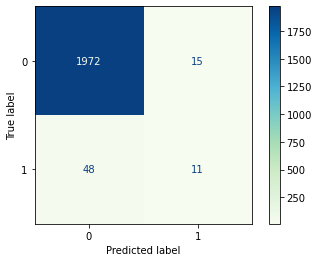

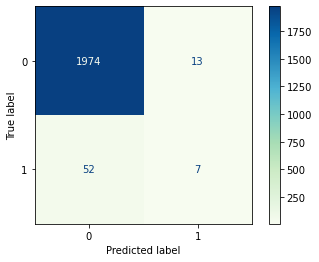

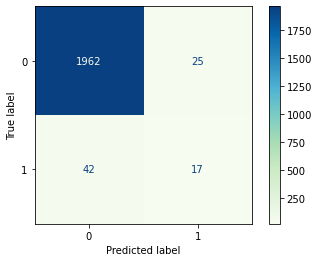

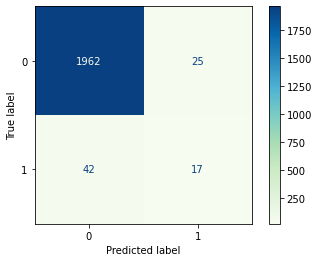

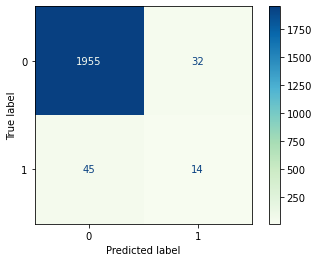

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix
plot_confusion_matrix(LogisticRegression().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix( KNeighborsClassifier().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix(LinearDiscriminantAnalysis().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix(LinearDiscriminantAnalysis().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix(MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01).fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plt.show()

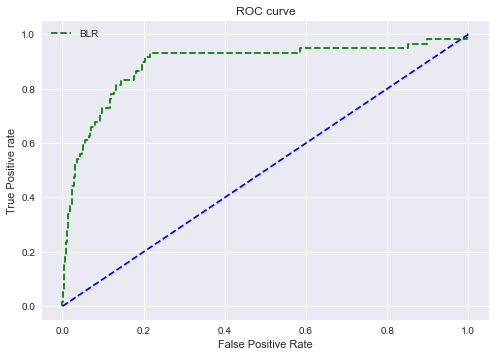

In [129]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='BLR')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

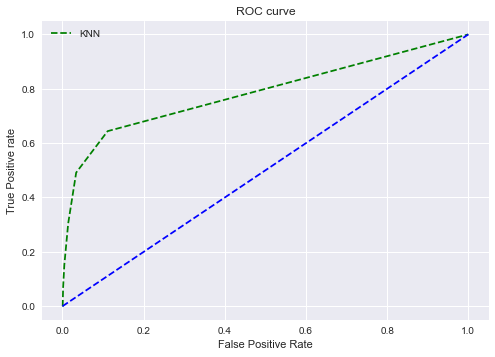

In [130]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

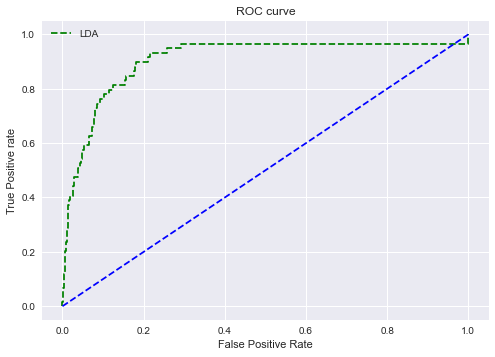

In [131]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr4, tpr4, linestyle='--',color='green', label='LDA')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

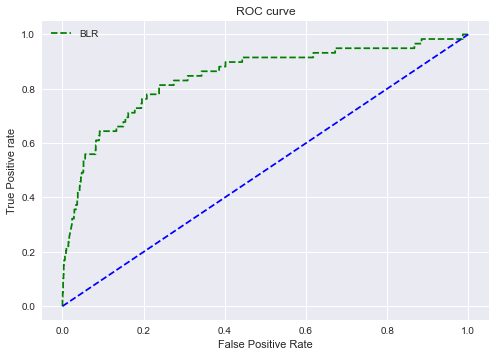

In [132]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr5, tpr5, linestyle='--',color='green', label='BLR')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# After Data Balance

C:\Users\ARSHIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

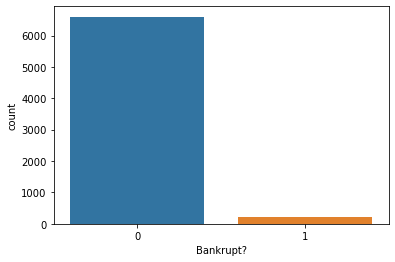

In [3]:
n=df['Bankrupt?'].value_counts()
n
sb.countplot(df['Bankrupt?'])

In [4]:
n

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [134]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros =ros.fit_resample(X,y)
print(f"Resampled dataset : { Counter(y_ros)}")


Resampled dataset : Counter({1: 6599, 0: 6599})


In [135]:
Resampled = pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)], axis= 1)
Resampled     

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.

In [136]:
X=Resampled.drop('Bankrupt?',axis = 1)
y=Resampled["Bankrupt?"]

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)

C:\Users\ARSHIYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [46]:
y_pred = classifier1.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1693  232]
 [ 234 1801]]


0.8823232323232323

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1925
           1       0.89      0.89      0.89      2035

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [ ]:
# Support Vector Machine

In [ ]:
#multicollinearity

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif= pd.DataFrame()
    vif['features'] =X.columns
    vif["VIF"] =[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    return(vif.round(1))

In [140]:
y =calc_vif(X).sort_values(by = ['VIF'])
y

C:\Users\ARSHIYA\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,features,VIF
93,Net Income Flag,0.000000e+00
27,Continuous Net Profit Growth Rate,1.000000e+00
92,Interest Coverage Ratio (Interest expense to ...,1.000000e+00
91,Degree of Financial Leverage (DFL),1.000000e+00
23,Realized Sales Gross Profit Growth Rate,1.000000e+00
34,Interest Expense Ratio,1.000000e+00
87,No-credit Interval,1.100000e+00
32,Current Ratio,1.100000e+00
57,Quick Assets/Current Liability,1.100000e+00
61,Inventory/Working Capital,1.100000e+00


In [141]:
df1= pd.read_csv('data1.csv')
df1

,Bankrupt?,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,1.256970e-04,0.000000e+00,0.458143,7.250730e-04,0.000000,0.311664,0.017560,0.022102,0.848195,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.005024,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.334015,0.276920,0.001036,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,1,2.897850e-04,0.000000e+00,0.461867,6.470650e-04,0.000000,0.318137,0.021144,0.022080,0.848088,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.005059,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.341106,0.289642,0.005210,2.394682e-02,0.931065,0.002226,0.025516,1.065200e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,1,2.361300e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.307102,0.005944,0.022760,0.848094,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.005100,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.336731,0.277456,0.013879,3.715116e-03,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1,1.078890e-04,0.000000e+00,0.465705,4.490450e-04,0.000000,0.321674,0.014368,0.022046,0.848005,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.005047,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.348716,0.276580,0.003540,2.216520e-02,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,1,7.890000e+09,0.000000e+00,0.462746,6.860690e-04,0.000000,0.319162,0.029690,0.022096,0.848258,0.217626,5.510000e+09,0.000439,0.265218,0.379690,0.006022,0.003727,0.636055,0.005150,0.005303,0.175412,0.001449,0.004367,1.633670e-04,2.935210e-04,0.040161,0.394371,0.023988,0.751822,0.260330,0.014161,0.004275,6.804640e-04,0.344639,0.287913,0.004869,0.000000e+00,0.913850,0.002224,0.026385,6.680000e+09,5.050000e+09,8.24000

In [142]:
X=df1.drop('Bankrupt?',axis = 1)
y=df1["Bankrupt?"]

In [143]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros =ros.fit_resample(X,y)
print(f"Resampled dataset : { Counter(y_ros)}")


Resampled dataset : Counter({1: 6599, 0: 6599})


In [144]:
Resampled = pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)], axis= 1)
Resampled     

,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,1.256970e-04,0.000000e+00,0.458143,0.000725,0.000000,0.311664,0.017560,0.022102,0.848195,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.005024,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.334015,0.276920,0.001036,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469,1
1,2.897850e-04,0.000000e+00,0.461867,0.000647,0.000000,0.318137,0.021144,0.022080,0.848088,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.005059,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.341106,0.289642,0.005210,0.023947,0.931065,0.002226,0.025516,1.065200e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794,1
2,2.361300e-04,2.550000e+07,0.458521,0.000790,0.000000,0.307102,0.005944,0.022760,0.848094,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.005100,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.336731,0.277456,0.013879,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474,1
3,1.078890e-04,0.000000e+00,0.465705,0.000449,0.000000,0.321674,0.014368,0.022046,0.848005,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.005047,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.348716,0.276580,0.003540,0.022165,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982,1
4,7.890000e+09,0.000000e+00,0.462746,0.000686,0.000000,0.319162,0.029690,0.022096,0.848258,0.217626,5.510000e+09,0.000439,0.265218,0.379690,0.006022,0.003727,0.636055,0.005150,0.005303,0.175412,0.001449,0.004367,1.633670e-04,2.935210e-04,0.040161,0.394371,0.023988,0.751822,0.260330,0.014161,0.004275,6.804640e-04,0.344639,0.287913,0.004869,0.000000,0.913850,0.002224,0.026385,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.622374,0.454411,0.578469,

In [145]:
X=Resampled.drop('Bankrupt?',axis = 1)
y=Resampled["Bankrupt?"]

In [146]:
X

,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1.256970e-04,0.000000e+00,0.458143,0.000725,0.000000,0.311664,0.017560,0.022102,0.848195,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.005024,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.334015,0.276920,0.001036,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,2.897850e-04,0.000000e+00,0.461867,0.000647,0.000000,0.318137,0.021144,0.022080,0.848088,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.005059,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.341106,0.289642,0.005210,0.023947,0.931065,0.002226,0.025516,1.065200e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,2.361300e-04,2.550000e+07,0.458521,0.000790,0.000000,0.307102,0.005944,0.022760,0.848094,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.005100,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.336731,0.277456,0.013879,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1.078890e-04,0.000000e+00,0.465705,0.000449,0.000000,0.321674,0.014368,0.022046,0.848005,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.005047,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.348716,0.276580,0.003540,0.022165,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,7.890000e+09,0.000000e+00,0.462746,0.000686,0.000000,0.319162,0.029690,0.022096,0.848258,0.217626,5.510000e+09,0.000439,0.265218,0.379690,0.006022,0.003727,0.636055,0.005150,0.005303,0.175412,0.001449,0.004367,1.633670e-04,2.935210e-04,0.040161,0.394371,0.023988,0.751822,0.260330,0.014161,0.004275,6.804640e-04,0.344639,0.287913,0.004869,0.000000,0.913850,0.002224,0.026385,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.622374,0.454411,0.578469,0.311567,0.047725,

In [147]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Eigenvalues:
[4.70438199 3.19338877 2.89260563 2.51424541 2.32083201 1.93333374
 1.63205325 1.6087914  1.4290193  1.31027334 1.27665029 1.22509123
 1.15361529 1.13342075 1.12222468 1.08482997 1.05629376 1.0406389
 1.02852805 1.00759881 1.00546136 0.99760948 0.98723335 0.98150105
 0.96668437 0.96057976 0.93983734 0.92223241 0.89739207 0.84934108
 0.80885824]

Variances (Percentage):
[9.94975257 6.75400683 6.11785147 5.31762084 4.90855213 4.08899455
 3.45178731 3.40258857 3.02237116 2.77122384 2.70011119 2.59106397
 2.43989258 2.39718119 2.37350154 2.29441185 2.23405787 2.20094787
 2.17533348 2.13106819 2.12654751 2.10994081 2.08799532 2.07587152
 2.04453429 2.03162305 1.98775291 1.95051853 1.8979813  1.79635362
 1.71073254]



Text(0, 0.5, 'Explained variance (%)')

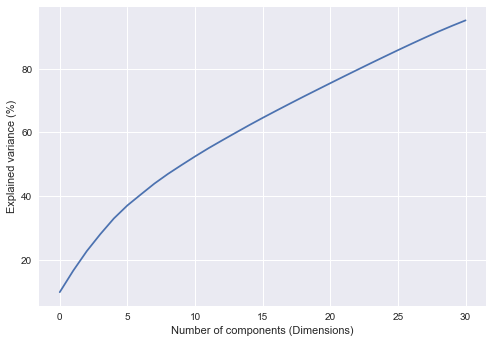

In [164]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components =0.95)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [165]:
explained_variance

array([0.09949753, 0.06754007, 0.06117851, 0.05317621, 0.04908552,
       0.04088995, 0.03451787, 0.03402589, 0.03022371, 0.02771224,
       0.02700111, 0.02591064, 0.02439893, 0.02397181, 0.02373502,
       0.02294412, 0.02234058, 0.02200948, 0.02175333, 0.02131068,
       0.02126548, 0.02109941, 0.02087995, 0.02075872, 0.02044534,
       0.02031623, 0.01987753, 0.01950519, 0.01897981, 0.01796354,
       0.01710733])

In [166]:
pca.n_components_

31

In [167]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [168]:
y_pred = classifier1.predict(X_test)

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1623  302]
 [ 284 1751]]


0.852020202020202

In [170]:
from sklearn.metrics import roc_curve, auc, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1925
           1       0.85      0.86      0.86      2035

    accuracy                           0.85      3960
   macro avg       0.85      0.85      0.85      3960
weighted avg       0.85      0.85      0.85      3960



In [171]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=7)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [172]:
y_pred = classifier2.predict(X_test)

C:\Users\ARSHIYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1737  188]
 [   0 2035]]


0.9525252525252526

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1925
           1       0.92      1.00      0.96      2035

    accuracy                           0.95      3960
   macro avg       0.96      0.95      0.95      3960
weighted avg       0.96      0.95      0.95      3960



In [175]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier4 = LinearDiscriminantAnalysis( )
classifier4.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [176]:
y_pred = classifier4.predict(X_test)

In [177]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1577  348]
 [ 334 1701]]


0.8277777777777777

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1925
           1       0.83      0.84      0.83      2035

    accuracy                           0.83      3960
   macro avg       0.83      0.83      0.83      3960
weighted avg       0.83      0.83      0.83      3960



In [193]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(8,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.61127071
Iteration 2, loss = 0.39155032
Iteration 3, loss = 0.33141683
Iteration 4, loss = 0.29975650
Iteration 5, loss = 0.28194015
Iteration 6, loss = 0.26734966
Iteration 7, loss = 0.25604308
Iteration 8, loss = 0.24845061
Iteration 9, loss = 0.23526092
Iteration 10, loss = 0.22811691
Iteration 11, loss = 0.22242145
Iteration 12, loss = 0.22023438
Iteration 13, loss = 0.21453759
Iteration 14, loss = 0.20720542
Iteration 15, loss = 0.20753783
Iteration 16, loss = 0.20573220
Iteration 17, loss = 0.19786752
Iteration 18, loss = 0.19434860
Iteration 19, loss = 0.19275438
Iteration 20, loss = 0.20115227
Iteration 21, loss = 0.19277852
Iteration 22, loss = 0.18516727
Iteration 23, loss = 0.18364682
Iteration 24, loss = 0.17939217
Iteration 25, loss = 0.18541876
Iteration 26, loss = 0.18481973
Iteration 27, loss = 0.17303547
Iteration 28, loss = 0.17914617
Iteration 29, loss = 0.17784794
Iteration 30, loss = 0.17780584
Iteration 31, loss = 0.16226496
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(8, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [194]:
ypred=clf.predict(X_test)

In [195]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1577  348]
 [ 334 1701]]


0.8277777777777777

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1925
           1       0.83      0.84      0.83      2035

    accuracy                           0.83      3960
   macro avg       0.83      0.83      0.83      3960
weighted avg       0.83      0.83      0.83      3960



In [197]:
pred_prob1 = classifier1.predict_proba(X_test)
pred_prob2 = classifier2.predict_proba(X_test)

pred_prob4 = classifier4.predict_proba(X_test)
pred_prob5 = clf.predict_proba(X_test)

In [198]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [199]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.9221348479530296 0.9828571428571429 0.8605597400049474 0.8992029101120009 0.96908299562845


TypeError: __init__() got an unexpected keyword argument 'n_neighbours'

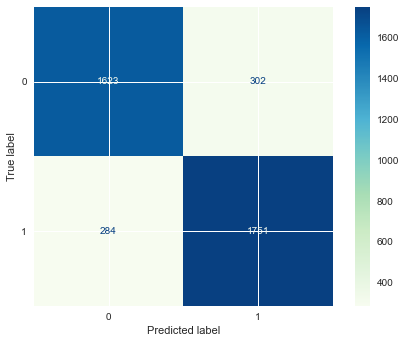

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix
plot_confusion_matrix(LogisticRegression().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix( KNeighborsClassifier(n_neighbours = 7).fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix(LinearDiscriminantAnalysis().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix(LinearDiscriminantAnalysis().fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plot_confusion_matrix(MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01).fit(X_train, y_train), X_test, y_test, cmap='GnBu')
plt.show()

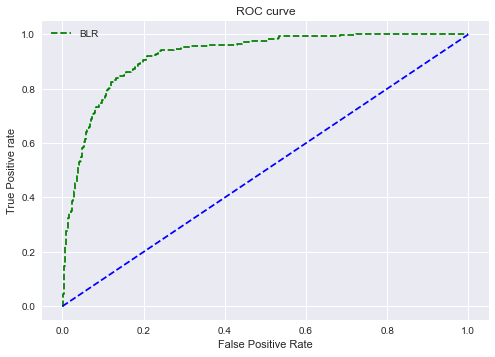

In [189]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='BLR')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

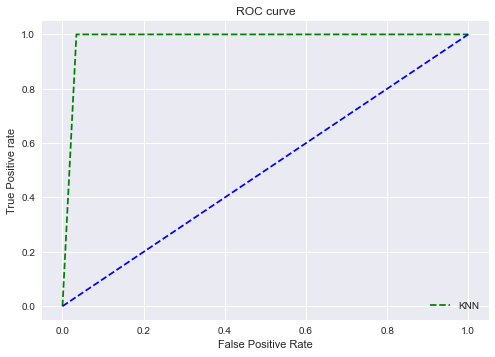

In [190]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

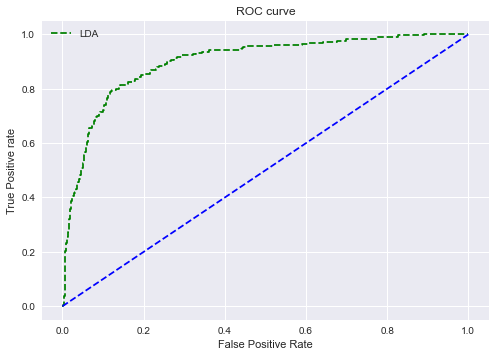

In [191]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr4, tpr4, linestyle='--',color='green', label='LDA')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

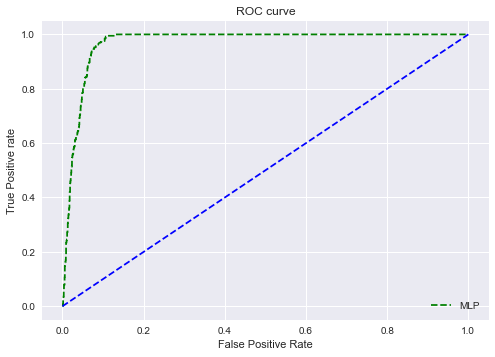

In [192]:
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr5, tpr5, linestyle='--',color='green', label='MLP')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();